In [1]:
from sklearn.preprocessing import StandardScaler 

import pandas as pd 

rfm = pd.read_csv('../data/processed/rfm_data.csv', index_col='CustomerID')

rfm_raw = rfm[['Recency', 'Frequency', 'Monetary']]


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_raw)


rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm.index, columns=rfm_raw.columns)

display(rfm_scaled_df.head())


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.396578,8.358668
12347.0,-0.905340,0.394649,0.250966
12348.0,-0.175360,-0.265435,-0.028596
12349.0,-0.735345,-0.081836,-0.033012
12350.0,2.174578,-0.326635,-0.191347


/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: Runt

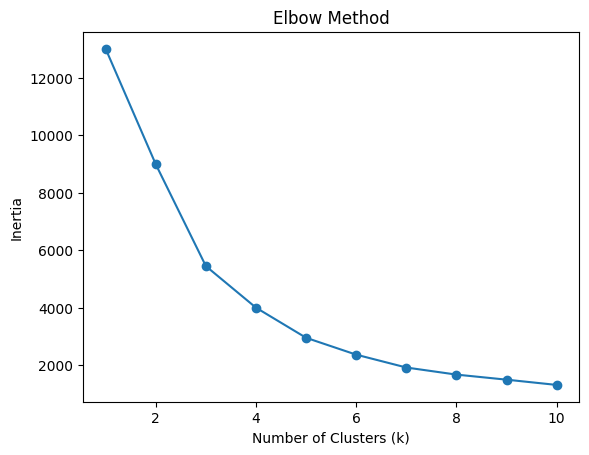

In [3]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

cluster_avg = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()


display(cluster_avg)

/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/anaconda3/envs/customer_seg/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: Runt

,Recency,Frequency,Monetary
Cluster,,,
0,41.341133,104.582512,2091.817116
1,2.000000,5807.000000,70925.287500
2,247.308333,27.787963,637.318510
3,7.666667,826.833333,190863.461667


Text(0.5, 1.0, 'Snake Plot of RFM Clusters')

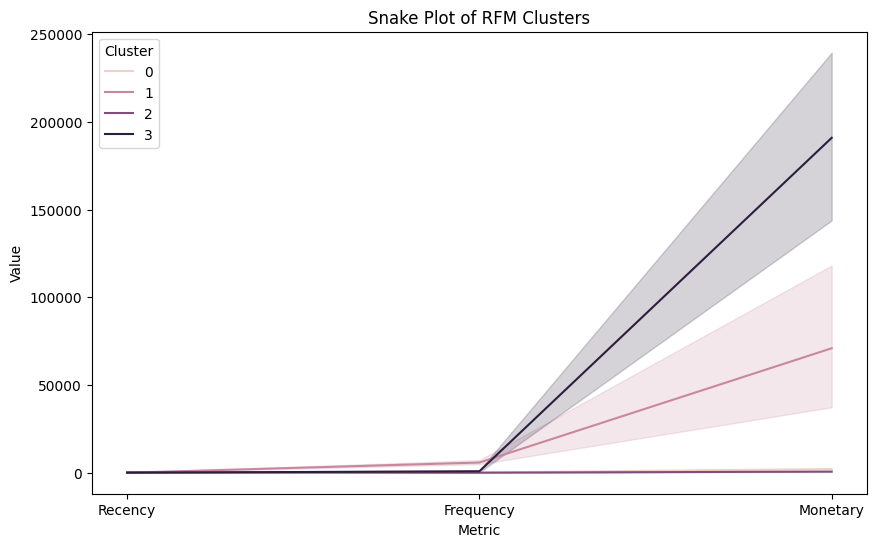

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
rfm_melt = pd.melt(rfm.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(data=rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.title('Snake Plot of RFM Clusters')


In [ ]:
git add notebooks/02_clustering_analysis.ipynb
git commit -m "Model: K-Means 클러스터링을 통한 고객 세분화 및 시각화 완료"
git push origin main